In [4]:
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

A bank found:
average number of cars waiting during the noon hour at a drive-up window <br>
**Poisson distribution**  
**mean = 2 cars**

- Make a chart of this distribution
- What is the probability that no cars drive up in the noon hour?
- What is the probability that 3 or more cars come through the drive through?
- How likely is it that the drive through gets at least 1 car?

Text(0, 0.5, 'P(X = x)')

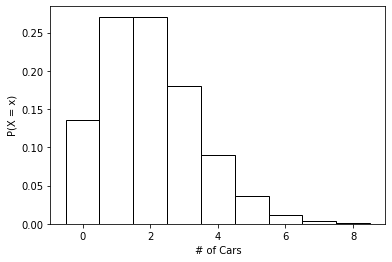

In [5]:
dist = stats.poisson(2)
n = 10_000 # number of experiments

x = [0, 1, 2, 3, 4, 5, 6, 7, 8] # of car
y = dist.pmf(x) # frequency

plt.bar(x, y, color='white', edgecolor='black', width=1)
plt.xlabel('# of Cars')
plt.ylabel('P(X = x)')

In [108]:
s = np.random.poisson(2, 100_000_000)
s

array([2, 3, 1, ..., 5, 0, 0])

In [109]:
est_drive = (s == 0).mean()
print("Possibility of zero car drive up in the noon hour is {:.2f}".format(est_drive))

Possibility of zero car drive up in the noon hour is 0.14


In [102]:
print("Possibility of zero car drive up in the noon hour is {:.2f}".format(stats.poisson(2).pmf(0)))

Possibility of zero car drive up in the noon hour is 0.14


In [110]:
est_3 = (s >= 3).mean()
print("Possibility of 3 or more cars drive up in the noon hour is {:.2f}".format(est_3))


Possibility of 3 or more cars drive up in the noon hour is 0.32


In [114]:
print("Possibility of 3 or more cars drive up in the noon hour is {:.2f}".format(stats.poisson(2).sf(2)))
# sf --> b

Possibility of 3 or more cars drive up in the noon hour is 0.32


In [112]:
est_1 = (s >= 1).mean()
print("Possibility of at least 1 car drive up in the noon hour is {:.2f}".format(est_1))

Possibility of at least 1 car drive up in the noon hour is 0.86


In [113]:
print("Possibility of at least 1 car drive up in the noon hour is {:.2f}".format(stats.poisson(2).sf(0)))
# cdf is inclusive, less than or equal to

Possibility of at least 1 car drive up in the noon hour is 0.86


Grades of State University graduates are normally distributed
mean of 3.0 
standard deviation of .3. 

- GPA required to be in the top 5% of the graduating class?
---------------------------------------------------------------------------------------------------------------
- An eccentric alumnus left scholarship money for students in the third decile  from the bottom of their class.
- Determine the range of the third decile = 20% - 30%
- Would a student with a 2.8 grade point average qualify for this scholarship?



In [117]:
μ = 3.0
σ = 0.3
trial_num = 100_000
gpa_distribution = np.random.normal(μ,σ, trial_num)
gpa_distribution = gpa_distribution.round(2)
gpa_distribution

array([3.22, 2.63, 3.11, ..., 2.52, 3.26, 2.99])

In [121]:
percent_5 = (np.percentile(gpa_distribution, 95).mean())
print("GPA for top 5% studendt is: {:.2f}".format(percent_5))

GPA for top 5% studendt is: 3.49


In [3]:
μ = 3.0
σ = 0.3
print("GPA for top 5% studendt is: {:.2f}".format(stats.norm(3,0.3).isf(0.05)))

GPA for top 5% studendt is: 3.49


In [128]:
percent_20= (np.percentile(gpa_distribution, 20).mean())
percent_20


2.75

In [129]:
percent_30= (np.percentile(gpa_distribution, 30).mean())
percent_30

2.84

In [134]:
twenty_percent = stats.norm(μ, σ).ppf(0.2) # less than or equal to 20%
twenty_percent

2.7475136299281258

In [132]:
thirty_percent = stats.norm(μ, σ).ppf(0.3) # less than or equal to 30%
thirty_percent

2.842679846187588

In [135]:
print("Eligibility for the scholarship is between the GPA range: {:.2f} and {:.2f}".format(twenty_percent, thirty_percent))

Eligibility for the scholarship is between the GPA range: 2.75 and 2.84


Marketing website: <b>
- P =  2% average click-through rate 
---------------------------------------------------------------
- N = 4326 visitors 
- 97 click-throughs. 
---------------------------------------------------------------
> How likely is it that this many people or more click through?

In [60]:
option = ["Click","Skipped"] 
clicking_dist = np.random.choice(option, [10_000,4326], p=[0.02, 0.98])
click_num =(((clicking_dist == "Click").sum(axis = 1))>= 97).mean()
print("Probability of equal or more than 97 click throughs: {:.2f}".format(click_num))

Probability of equal or more than 97 click throughs: 0.14


In [39]:
print("Probability of equal or more than 97 click throughs: {:.2f}".format(stats.binom(4326,0.02).sf(96)))


Probability of equal or more than 97 click throughs: 0.14


In [ ]:
n = 4326
p = 0.02

x = np.arrange(0, 200)
y_binom = stats.binom(n,p).pmf(x)
y_po = stats.poisson(n*p).pmf(x)
# plot and compare 2 models
# in this case almost identical

You are working on some statistics homework consisting of 
100 questions 
all the answers are a probability rounded to the hundreths place. 

Looking to save time, you put down random probabilities as the answer to each question.
What is the probability that at least one of your first 60 answers is correct?

In [179]:
answer = ["correct", "incorrect"]
prob_correct = [0.25, 0.75]
row = np.random.choice(answer, 60, prob_correct)
row
p = (row == "correct").sum()/60
print("The probabilty of getting at least 1 multiple choice question correct (Total = 60) by random guess is: {:.2f}".format(p))



The probabilty of getting at least 1 multiple choice question correct (Total = 60) by random guess is: 0.45


In [180]:
# p = 0.01
# n = 60

print("The probabilty of getting at least 1 multiple choice question correct (Total = 60) by random guess is: {:.2f}".format(1 - stats.binom(60,0.01).cdf(0)))

The probabilty of getting at least 1 multiple choice question correct (Total = 60) by random guess is: 0.45


The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [131]:
traffic = round(0.9*3*22)
clean_day = ((np.random.random([100_000, traffic]) <= 0.03).sum(axis = 1)) >= 1
# return a list of T/F
# indicate at least one person cleaned up breakroom
result = np.count_nonzero(clean_day) / 100000
# count how many days at least one person cleanned / total trials
print("Probability of having clean breakroom: {:.2f}". format(result))

Probability of having clean breakroom: 0.84


In [117]:
print("Probability of having dirty breakroom for 2 consecutive days: {:.2f}". format((1 - result) ** 2))

Probability of having dirty breakroom for 2 consecutive days: 0.03


In [114]:
print("Probability of having dirty breakroom for a whole week: {}". format((1 - result) ** 5))

0.00012661983057503533

In [6]:
print("Probability of having clean breakroom: {:.2f}". format(stats.binom(59,0.03).sf(0)))

Probability of having clean breakroom: 0.83


In [139]:
print("Probability of having dirty breakroom 2 days in a row: {}". format((stats.binom(2, (1-result)).sf(1))))

Probability of having dirty breakroom 2 days in a row: 0.02709315999999999


In [138]:
print("Probability of having dirty breakroom 5 days in a row: {}". format((stats.binom(5, (1-result)).sf(4))))

Probability of having dirty breakroom 5 days in a row: 0.00012082287187210964


average people in line when your lunch break starts is 
normally distributed 
μ = 15 
σ = 3 

2 minutes/order
10 minutes from ordering to getting your food, 

Probability having >= 15 minutes to eat 
Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

>noon, wait line = 15 +/- 3
range = 12 - 18
worse case scenario, 
time in line will be 18 * 2 = 36min
plus order-receive food = 10min
worse wait time = 46min
-------------------------------------------------------------------
Assume no people in line:
2 + 10 + 15 = 27 (my own order, wait, eat)
60 - 27 = 33min 
Can only have at least 15min to eat if people in line <= 14

In [140]:
μ = 15
σ = 3
trial_n = 100_000
line = np.random.normal(μ, σ, trial_n).round()
line
wait_time = (line*2)+2+10
wait_time
p = (wait_time <= 44).mean()

print("Probability of having at least 45 minute to eat: {:.2f}".format(p))

Probability of having at least 45 minute to eat: 0.69


In [151]:
μ = 15
σ = 3
time = 60-12-15
# 2(max_people) = 33
max_people = round(33/2)
stats.norm(μ, σ).cdf(max_people)

0.6305586598182363

Use employees data 
Find μ, σ for current employees
Model the distribution of employees salaries with a normal distribution and answer the following questions:

- What percent of employees earn less than 60,000?
- What percent of employees earn more than 95,000?
- What percent of employees earn between 65,000 and 80,000?
- What do the top 5% of employees make?

In [236]:
def get_db_url():
    url = f'mysql+pymysql://{user}:{password}@{host}/{database_name}'
    return url
from env import host, user, password
database_name = input("Input desired database name: ")
query = input("Key in the query ")
df = pd.read_sql(query,get_db_url())
df.head(5)

Input desired database name: employees
Key in the query select * from salaries where to_date > now()


,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


In [248]:
μ_sal = df.salary.mean()
print("Average salary: {:.2f}".format(μ_sal))

Average salary: 72012.24


In [250]:
σ_sal = df.salary.std()
print("Standard deviation of salary: {:.2f}".format(σ_sal))

Standard deviation of salary: 17310.00


In [298]:
sal_dist = np.random.normal(μ_sal,σ_sal,240124)
# lower_60 = (sal_dist < 60000).sum()/240124
higher_95 = (sal_dist > 95000).sum()/240124
between_65_80 = (np.count_nonzero(sal_dist[(np.where((sal_dist > 65000) & (sal_dist < 80000)))]))/240124
between_65_80
top_5_percent = (np.percentile(sal_dist, 95))

print("Probabilty of employers...") 
print("Earning less than 60K is {:.2f}".format(lower_60))
print("Earning higher than 95K is {:.2f}".format(higher_95))
print("Earning between 65K and 80K is {:.2f}".format(between_65_80))
print("Top 5% earning: ${:.2f}". format(top_5_percent))


Probabilty of employers...
Earning less than 60K is 0.24
Earning higher than 95K is 0.09
Earning between 65K and 80K is 0.33
Top 5% earning: $100622.34


In [256]:
salary_below_60K = stats.norm(μ,σ).cdf(59999)
print("Probability of employees earning less than 60K: {:.2f}".format(salary_below_60K))

Probability of employees earning less than 60K: 0.24


In [259]:
salary_above_95K = stats.norm(μ,σ).sf(95000)
salary_above_95K
print("Probability of employees earning more than 95K: {:.2f}".format(salary_above_95K))

Probability of employees earning more than 95K: 0.09


In [247]:
# What percent of employees earn between 65,000 and 80,000?
emp_total = df.emp_no.count()
(stats.norm(μ,σ).cdf(80000)-stats.norm(μ,σ).cdf(64999))

0.33508179968418816

In [244]:
emp_total = df.emp_no.count()
emp_total

240124

In [246]:
df.nunique()

emp_no       240124
salary        67724
from_date       364
to_date           1
dtype: int64

In [262]:
salary_top95 = stats.norm(μ,σ).isf(0.05)
salary_top95
print("Top 5% of employees make ${:.2f}".format(salary_top95))

Top 5% of employees make $100484.64
